In [1]:
import warnings
warnings.filterwarnings('ignore')

## Fetching the Dataset

In [2]:
import pandas as pd
import numpy as np
# Import the dataset and give the column names
ratings_df = pd.read_csv("C:/Users/RAVINDER CHOUDHARY/Desktop/Practice/Python/Recommendation System/ratings/ratings.csv")
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [3]:
ratings_df.shape

(981756, 3)

In [4]:
#Check the number of rows and columns
rows,columns = ratings_df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  981756
Number of columns:  3


In [5]:
#Check the datatypes
ratings_df.dtypes

book_id    int64
user_id    int64
rating     int64
dtype: object

In [6]:
print('Size of the ratings dataset is: ', ratings_df.memory_usage().sum() / 1024**2, ' MB')

Size of the ratings dataset is:  22.470733642578125  MB


In [7]:
ratings_df.info

<bound method DataFrame.info of         book_id  user_id  rating
0             1      314       5
1             1      439       3
2             1      588       5
3             1     1169       4
4             1     1185       4
...         ...      ...     ...
981751    10000    48386       5
981752    10000    49007       4
981753    10000    49383       5
981754    10000    50124       5
981755    10000    51328       1

[981756 rows x 3 columns]>

In [8]:
books_df = pd.read_csv("C:/Users/RAVINDER CHOUDHARY/Desktop/Practice/Python/Recommendation System/books/books.csv")
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [9]:
books_df.shape

(10000, 23)

In [10]:
rows,columns = books_df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  10000
Number of columns:  23


In [11]:
books_df.dtypes

id                             int64
book_id                        int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
dtype: object

In [12]:
print('Size of the Book dataset is: ', books_df.memory_usage().sum() / 1024**2, ' MB')

Size of the Book dataset is:  1.7548828125  MB


In [13]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [14]:
books_df = books_df[['book_id','title','isbn','original_publication_year','language_code']]

In [15]:
books_df.shape

(10000, 5)

### Rating Distribution

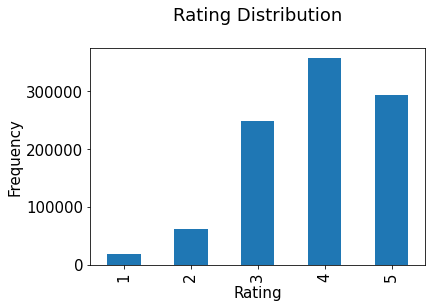

In [16]:
import matplotlib.pyplot as plt
plt.rc("font", size=15)
ratings_df.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

We can see that maximum rating will be 4 and minimum rating corresponds to 1

### Book Distribution as per Publication year

In [17]:
books_df.original_publication_year.max()

2017.0

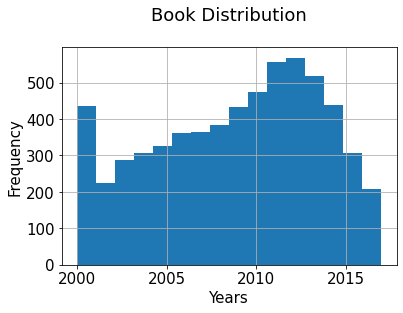

In [18]:
books_df.original_publication_year.hist(bins=np.linspace(2000,2017,17).tolist())
plt.title('Book Distribution\n')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

We can see that maximum count of books lies in the year 2012

In [19]:
ratings_df = ratings_df.sample(frac=1).reset_index(drop=True)
# np.random.shuffle(ratings_df.values)

In [20]:
#Taking subset of the dataset
ratings_df = ratings_df.iloc[0:50000,0:]

Since data is quite big, we consider only 50,000 records of dataset

In [21]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   book_id  50000 non-null  int64
 1   user_id  50000 non-null  int64
 2   rating   50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


In [22]:
# statistics Summary 
ratings_df['rating'].describe().transpose()

count    50000.00000
mean         3.85286
std          0.98622
min          1.00000
25%          3.00000
50%          4.00000
75%          5.00000
max          5.00000
Name: rating, dtype: float64

In [23]:
# Find the minimum and maximum Book ratings
print('Minimum rating is: %d' %(ratings_df.rating.min()))
print('Maximum rating is: %d' %(ratings_df.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


So Book Range lies between (1 - 5)

## Checking Missing Values

In [24]:
print('Number of missing values across columns:\n',ratings_df.isnull().sum())

Number of missing values across columns:
 book_id    0
user_id    0
rating     0
dtype: int64


There is no NA records being found.

### Counting Unique Users and Books

In [25]:
print('Number of unique users = ', ratings_df['user_id'].nunique())
print('Number of unique books = ', ratings_df['book_id'].nunique())

Number of unique users =  23054
Number of unique books =  9940


### Top 10 users based on ratings

In [26]:
most_rated_users = ratings_df.groupby('user_id').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated_users)

Top 10 users based on ratings: 
 user_id
14248    19
6342     18
14372    17
44397    17
37564    16
48559    16
9731     16
25164    16
27460    16
12476    16
dtype: int64


In [27]:
# users with less than 15 rating are excluded
counts_users = ratings_df.user_id.value_counts()
ratings_df_final = ratings_df[ratings_df.user_id.isin(counts_users[counts_users >= 15].index)]
print('Number of users who have rated 50 or more items =', len(ratings_df_final))
print('Number of unique users in the final data = ', ratings_df_final['user_id'].nunique())
print('Number of unique products in the final data = ', ratings_df_final['book_id'].nunique())

Number of users who have rated 50 or more items = 366
Number of unique users in the final data =  23
Number of unique products in the final data =  317


## Ratings Analysis in Final dataset

In [28]:
print('Average book rating: ', round(ratings_df_final['rating'].mean(), 2))

Average book rating:  3.75


In [29]:
rating_count = pd.DataFrame(ratings_df_final.groupby('book_id')['rating'].count())
rc = rating_count.sort_values('rating', ascending=False)
rc.head()

,rating
book_id,
704,4
1681,3
44,3
97,3
109,3


### Considering Rating Counts as Parameter for Recommendations

In [30]:
average_rating = pd.DataFrame(ratings_df.groupby('book_id')['rating'].mean())
average_rating['RatingCount'] = pd.DataFrame(ratings_df.groupby('book_id')['rating'].count())
average_rating.sort_values('RatingCount', ascending=False).head()

,rating,RatingCount
book_id,,
2932,3.866667,15
2592,3.800000,15
3137,3.785714,14
2110,4.142857,14
3911,3.928571,14


Let look at another better Recommendation System.

## Constructing the pivot table

In [31]:
ratings_matrix = ratings_df_final.pivot(index = 'user_id', columns ='book_id', values = 'rating').fillna(0)
ratings_matrix.head()

book_id,1,3,4,5,6,9,11,13,14,15,...,6578,6751,6926,7298,8064,8656,8906,8916,9286,9623
user_id,,,,,,,,,,,,,,,,,,,,,
6342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9731,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
12476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12874,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


It shows that it is a sparse matrix. So, many cells are filled with 0 values.

In [32]:
print('Shape of ratings_matrix: ', ratings_matrix.shape)

Shape of ratings_matrix:  (23, 317)


### Calculating the density of rating marix

In [33]:
num_of_ratings = np.count_nonzero(ratings_matrix)
print('num_of_ratings = ', num_of_ratings)
total_num_of_ratings = ratings_matrix.shape[0] * ratings_matrix.shape[1]
print('total_num_of_ratings = ', total_num_of_ratings)
density = (num_of_ratings/total_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

num_of_ratings =  366
total_num_of_ratings =  7291
density: 5.02%


## Building Popularity Recommder model

In [34]:
# Counting of user_id for each unique book as recommendation score 
ratings_df_final_temp = ratings_df_final.groupby('book_id').agg({'user_id': 'count'}).reset_index()
ratings_df_final_temp.rename(columns = {'user_id': 'score'},inplace=True)
ratings_df_final_temp.head(20)

,book_id,score
0,1,1
1,3,1
2,4,1
3,5,1
4,6,1
5,9,1
6,11,1
7,13,2
8,14,1
9,15,3


In [35]:
# Sort the books on recommendation score 
data_sort = ratings_df_final_temp.sort_values(['score', 'book_id'], ascending = [0,1]) 
      
# Generate a recommendation rank based upon score 
data_sort['rank'] = data_sort['score'].rank(ascending=0, method='first') 
          
# Get the top 5 recommendations 
popularity_recommendations = data_sort.head() 
popularity_recommendations

,book_id,score,rank
166,704,4,1.0
9,15,3,2.0
13,24,3,3.0
24,44,3,4.0
43,97,3,5.0


In [36]:
# Use popularity based recommender model to make predictions
# function to get the recommends
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
           
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [37]:
user_recom_choice = [5,10,15,20]  
for i in user_recom_choice:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

The list of recommendations for the userId: 5

     userId  book_id  score  rank
166       5      704      4   1.0
9         5       15      3   2.0
13        5       24      3   3.0
24        5       44      3   4.0
43        5       97      3   5.0


The list of recommendations for the userId: 10

     userId  book_id  score  rank
166      10      704      4   1.0
9        10       15      3   2.0
13       10       24      3   3.0
24       10       44      3   4.0
43       10       97      3   5.0


The list of recommendations for the userId: 15

     userId  book_id  score  rank
166      15      704      4   1.0
9        15       15      3   2.0
13       15       24      3   3.0
24       15       44      3   4.0
43       15       97      3   5.0


The list of recommendations for the userId: 20

     userId  book_id  score  rank
166      20      704      4   1.0
9        20       15      3   2.0
13       20       24      3   3.0
24       20       44      3   4.0
43       20       97 

As we known that it is a Popularity recommender model, so all the 4 users will get the same recommendations.It is a Non-personalized recommender system.

## User Based Collaborative Filtering model

In [38]:
pivot_df = ratings_df_final.pivot(index = 'user_id', columns ='book_id', values = 'rating').fillna(0)
pivot_df.head()

book_id,1,3,4,5,6,9,11,13,14,15,...,6578,6751,6926,7298,8064,8656,8906,8916,9286,9623
user_id,,,,,,,,,,,,,,,,,,,,,
6342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9731,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
12476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12874,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [39]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

book_id,1,3,4,5,6,9,11,13,14,15,...,6751,6926,7298,8064,8656,8906,8916,9286,9623,user_index
user_id,,,,,,,,,,,,,,,,,,,,,
6342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9731,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2
12476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
12874,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4


In [40]:
pivot_df.set_index(['user_index'], inplace=True)
pivot_df.head()

book_id,1,3,4,5,6,9,11,13,14,15,...,6578,6751,6926,7298,8064,8656,8906,8916,9286,9623
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


As this is a sparse matrix we will use SVD.

## Singular Value Decomposition

In [41]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(pivot_df, k = 10) # k represents the features

In [42]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[ 5.31463267e-02  2.47097473e-02 -3.09801923e-02  2.94432667e-01
   6.62276686e-01 -1.11602704e-01  1.40989709e-01 -5.64287406e-01
  -1.51570875e-02  2.12495952e-01]
 [ 3.38895943e-03  1.78769937e-02  7.53310418e-02  1.08158848e-01
   1.77550280e-01 -2.11304596e-02  2.47177212e-02 -7.79705903e-02
  -1.46669024e-03  4.28729330e-02]
 [-5.12266743e-02 -6.07216477e-03  1.31352074e-01 -4.07553055e-02
   2.48544068e-03  4.24427244e-03 -2.08519779e-03  2.24073719e-02
   3.99715966e-03  1.50807633e-01]
 [-8.96191799e-03  9.61726179e-03  6.76113265e-03 -2.06805102e-02
  -7.92432006e-02  6.33979890e-02  6.03846492e-02 -6.41026948e-02
  -1.07416063e-03  1.32909993e-02]
 [ 5.37806626e-02 -1.21410161e-01 -7.81937728e-02 -5.87752189e-02
  -2.38757394e-02  1.95571859e-02 -6.10521106e-02 -1.79049586e-01
  -4.19781641e-03  1.05800473e-01]
 [ 8.93650717e-02  1.27235930e-01 -2.97577372e-01  1.97870022e-01
  -1.41527679e-01  3.57779614e-01 -7.50422514e-01 -2.03102164e-01
  -1.5292

In [43]:
print('Sigma: \n',sigma)

Sigma: 
 [15.3078039  15.61572648 15.8002599  16.42888601 17.25924574 18.01707127
 18.3137285  19.02619265 19.36952216 19.81108859]


In [44]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[15.3078039   0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         15.61572648  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         15.8002599   0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         16.42888601  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         17.25924574  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         18.01707127
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  18.3137285   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         19.02619265  0.          0.        ]
 [ 0.          0.          0.        

In [45]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[-1.12615750e-01 -6.75891666e-02  1.75664200e-02 ...  7.02656801e-03
  -1.20666270e-02 -1.98459365e-02]
 [ 1.08949054e-01  9.09681124e-03 -3.88743236e-02 ... -1.55497294e-02
   2.49447209e-03 -6.07828971e-02]
 [ 9.25280408e-03 -2.56590807e-02 -2.47444578e-02 ... -9.89778311e-03
   1.16384657e-03  2.10947167e-01]
 ...
 [ 1.79432813e-02 -1.55480779e-02 -4.70534461e-02 ... -1.88213785e-02
  -1.24404366e-03 -9.71826189e-03]
 [ 1.55834581e-03 -5.51735711e-03 -1.08361383e-03 ... -4.33445531e-04
  -1.85914853e-05 -5.98218837e-04]
 [ 4.05691937e-02  9.46603129e-03  2.67023371e-02 ...  1.06809348e-02
   2.00665032e-04  7.34409024e-03]]


In [46]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

book_id,1,3,4,5,6,9,11,13,14,15,...,6578,6751,6926,7298,8064,8656,8906,8916,9286,9623
0,-0.071412,0.238852,0.409769,0.327815,-0.012210,0.003834,-0.041550,5.455947,0.620084,-0.080860,...,-0.020439,-0.051938,-0.040879,0.003429,-0.092507,0.174629,0.003834,0.163908,-0.040879,-0.015389
1,0.054452,0.019871,-0.009472,-0.007578,-0.003043,0.030652,-0.110798,1.266294,0.174616,0.035808,...,-0.004806,-0.138497,-0.009612,-0.025906,0.008260,0.018742,0.030652,-0.003789,-0.009612,0.309934
2,0.205909,0.028898,0.010922,0.008738,-0.002634,0.134595,0.056470,0.047260,0.030652,1.300491,...,0.006357,0.070588,0.012714,-0.061379,0.135439,0.000682,0.134595,0.004369,0.012714,0.422951
3,0.031116,-0.010982,0.056854,0.045483,0.000822,0.007925,-0.004325,-0.132567,-0.029799,0.002798,...,0.006309,-0.005406,0.012617,-0.002753,0.024366,-0.013291,0.007925,0.022741,0.012617,0.003917
4,-0.320511,0.063307,0.375758,0.300606,-0.007151,0.006553,0.273468,0.402192,-0.005683,0.521754,...,-0.004796,0.341834,-0.009592,0.050696,-0.186810,0.070763,0.006553,0.150303,-0.009592,-0.118733


### Recommend the books with the highest predicted ratings

In [47]:
def get_recommend_items(userID, pivot_df, preds_df, num_recommendations):
    user_idx = userID - 1
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Books'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [48]:
user_id = 4
num_recommendations = 10
get_recommend_items(user_id, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Books                                
3950                        0.0          0.665924
377                         0.0          0.665924
529                         0.0          0.665924
405                         0.0          0.665924
46                          0.0          0.665924
47                          0.0          0.665924
1512                        0.0          0.665924
196                         0.0          0.665924
72                          0.0          0.665924
5616                        0.0          0.665924


In [49]:
user_id = 8
num_recommendations = 5
get_recommend_items(user_id, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Books                                
1108                        0.0          1.800634
1679                        0.0          1.800634
934                         0.0          1.574109
371                         0.0          1.440507
576                         0.0          1.440507


In [50]:
user_id = 15
num_recommendations = 10
get_recommend_items(user_id, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 15):

                   user_ratings  user_predictions
Recommended Books                                
180                         0.0          0.810369
24                          0.0          0.541511
587                         0.0          0.422951
119                         0.0          0.387417
354                         0.0          0.387417
79                          0.0          0.387417
15                          0.0          0.346231
556                         0.0          0.317214
451                         0.0          0.317214
3237                        0.0          0.317214


Since, It is a Collaborative recommender model, so all the 3 users are being with different recommendations based on users past behaviour.

### Correlation of book_id = 1 with others Books 

In [52]:
book_id1_rating = pivot_df[1]    
similar_to_book1 = pivot_df.corrwith(book_id1_rating)
corr = pd.DataFrame(similar_to_book1, columns=['pearsonR'])
corr_summary = corr.join(average_rating['RatingCount'])
corr_summary[corr_summary['RatingCount']>=10].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,RatingCount
book_id,,
16,0.602717,14
98,0.576352,10
1221,-0.045455,10
1176,-0.045455,10
421,-0.045455,10
931,-0.045455,10
3222,-0.045455,11
576,-0.045455,10
264,-0.045455,11


## Collaborative Filtering Using k-Nearest Neighbors (kNN)

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors.

In [53]:
combine_book_rating = pd.merge(ratings_df, books_df, on='book_id')
combine_book_rating.head()

,book_id,user_id,rating,title,isbn,original_publication_year,language_code
0,117,12874,4,Heretics of Dune (Dune Chronicles #5),441328008,1984.0,eng
1,117,37284,4,Heretics of Dune (Dune Chronicles #5),441328008,1984.0,eng
2,117,14207,2,Heretics of Dune (Dune Chronicles #5),441328008,1984.0,eng
3,117,15604,5,Heretics of Dune (Dune Chronicles #5),441328008,1984.0,eng
4,117,10146,4,Heretics of Dune (Dune Chronicles #5),441328008,1984.0,eng


In [54]:
table_bookRating =  combine_book_rating[['user_id','isbn','rating','title']]
table_bookRating.rename(columns = {'user_id':'User Id','isbn':'ISBN','rating':'Rating','title':'Title'}, inplace = True)
table_bookRating.head()

,User Id,ISBN,Rating,Title
0,12874,441328008,4,Heretics of Dune (Dune Chronicles #5)
1,37284,441328008,4,Heretics of Dune (Dune Chronicles #5)
2,14207,441328008,2,Heretics of Dune (Dune Chronicles #5)
3,15604,441328008,5,Heretics of Dune (Dune Chronicles #5)
4,10146,441328008,4,Heretics of Dune (Dune Chronicles #5)


In [55]:
table_totalRatingCount = combine_book_rating[['user_id','isbn','rating','title']]
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['title'])

table_totalRatingCount = (combine_book_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
table_totalRatingCount.rename(columns = {'title':'Title'}, inplace = True)
table_totalRatingCount.head()

,Title,totalRatingCount
0,'Salem's Lot,5
1,"'Tis (Frank McCourt, #2)",5
2,1421: The Year China Discovered America,7
3,1776,6
4,1984,5


In [56]:
combine_rating = table_bookRating.merge(table_totalRatingCount, left_on = 'Title', right_on = 'Title', how = 'left')
combine_rating.head(10)

,User Id,ISBN,Rating,Title,totalRatingCount
0,12874,441328008,4,Heretics of Dune (Dune Chronicles #5),6
1,37284,441328008,4,Heretics of Dune (Dune Chronicles #5),6
2,14207,441328008,2,Heretics of Dune (Dune Chronicles #5),6
3,15604,441328008,5,Heretics of Dune (Dune Chronicles #5),6
4,10146,441328008,4,Heretics of Dune (Dune Chronicles #5),6
5,33872,441328008,5,Heretics of Dune (Dune Chronicles #5),6
6,20180,375814248,4,James and the Giant Peach,5
7,37565,375814248,3,James and the Giant Peach,5
8,8506,375814248,3,James and the Giant Peach,5
9,9455,375814248,2,James and the Giant Peach,5


In [57]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(table_totalRatingCount['totalRatingCount'].describe())

count   807.000
mean      4.903
std       2.211
min       1.000
25%       3.000
50%       5.000
75%       6.000
max      15.000
Name: totalRatingCount, dtype: float64


In [58]:
print(table_totalRatingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    8.000
0.910    8.000
0.920    8.000
0.930    8.000
0.940    9.000
0.950    9.000
0.960    9.000
0.970   10.000
0.980   10.000
0.990   10.000
Name: totalRatingCount, dtype: float64


In [59]:
popularity_threshold = 10
rating_popular_book = combine_rating.query('totalRatingCount >= @popularity_threshold')
rating_popular_book

,User Id,ISBN,Rating,Title,totalRatingCount
121,36492,61020613,4,"Witches Abroad (Discworld, #12; Witches #3)",10
122,47662,61020613,4,"Witches Abroad (Discworld, #12; Witches #3)",10
123,35438,61020613,5,"Witches Abroad (Discworld, #12; Witches #3)",10
124,40315,61020613,4,"Witches Abroad (Discworld, #12; Witches #3)",10
125,44260,61020613,4,"Witches Abroad (Discworld, #12; Witches #3)",10
...,...,...,...,...,...
2865,12485,743219570,2,Cover Her Face (Adam Dalgliesh #1),11
2866,14507,743219570,4,Cover Her Face (Adam Dalgliesh #1),11
2867,40872,743219570,5,Cover Her Face (Adam Dalgliesh #1),11
2868,15431,743219570,5,Cover Her Face (Adam Dalgliesh #1),11


In [60]:
rating_popular_book.shape

(272, 5)

### Implementing kNN

In [61]:
from scipy.sparse import csr_matrix
rating_popular_book = rating_popular_book.drop_duplicates(['User Id', 'Title'])
popular_book_rating_pivot = rating_popular_book.pivot(index = 'Title', columns = 'User Id', values = 'Rating').fillna(0)
popular_book_rating_matrix = csr_matrix(popular_book_rating_pivot.values)

In [62]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(popular_book_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [63]:
query_index = np.random.choice(popular_book_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(popular_book_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
query_index

24

In [64]:
popular_book_rating_pivot.index[query_index]

'What to Expect the First Year (What to Expect)'

In [65]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for "{0}":\n'.format(popular_book_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, popular_book_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for "What to Expect the First Year (What to Expect)":

1: The Odyssey, with distance of 1.0:
2: The Rainmaker, with distance of 1.0:
3: The Innocent Man: Murder and Injustice in a Small Town, with distance of 1.0:
4: The Street Lawyer, with distance of 1.0:
5: The Portrait of a Lady, with distance of 1.0:


## Evaluation of Collabrative Recommendation Model

In [66]:
pivot_df.head()

book_id,1,3,4,5,6,9,11,13,14,15,...,6578,6751,6926,7298,8064,8656,8906,8916,9286,9623
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,3.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,4.000,...,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,5.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000


In [67]:
# Average ACTUAL rating for each item
pivot_df.mean().head()

book_id
1   0.174
3   0.130
4   0.217
5   0.174
6   0.217
dtype: float64

In [68]:
# Predicted ratings 
preds_df.head()

book_id,1,3,4,5,6,9,11,13,14,15,...,6578,6751,6926,7298,8064,8656,8906,8916,9286,9623
0,-0.071,0.239,0.410,0.328,-0.012,0.004,-0.042,5.456,0.620,-0.081,...,-0.020,-0.052,-0.041,0.003,-0.093,0.175,0.004,0.164,-0.041,-0.015
1,0.054,0.020,-0.009,-0.008,-0.003,0.031,-0.111,1.266,0.175,0.036,...,-0.005,-0.138,-0.010,-0.026,0.008,0.019,0.031,-0.004,-0.010,0.310
2,0.206,0.029,0.011,0.009,-0.003,0.135,0.056,0.047,0.031,1.300,...,0.006,0.071,0.013,-0.061,0.135,0.001,0.135,0.004,0.013,0.423
3,0.031,-0.011,0.057,0.045,0.001,0.008,-0.004,-0.133,-0.030,0.003,...,0.006,-0.005,0.013,-0.003,0.024,-0.013,0.008,0.023,0.013,0.004
4,-0.321,0.063,0.376,0.301,-0.007,0.007,0.273,0.402,-0.006,0.522,...,-0.005,0.342,-0.010,0.051,-0.187,0.071,0.007,0.150,-0.010,-0.119


In [69]:
# Average PREDICTED rating for each item
preds_df.mean().head()

book_id
1   0.182
3   0.126
4   0.130
5   0.104
6   0.218
dtype: float64

In [70]:
rmse_df = pd.concat([pivot_df.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)

cols = rmse_df.columns.tolist() 
cols = cols[-1:] + cols[:-1] 
rmse_df = rmse_df[cols] 

rmse_df.head()

,item_index,Avg_actual_ratings,Avg_predicted_ratings
book_id,,,
1,0,0.174,0.182
3,1,0.130,0.126
4,2,0.217,0.130
5,3,0.174,0.104
6,4,0.217,0.218


In [71]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.08274 

